In [34]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import ticker module
import matplotlib.dates as mdates  # Import dates module
import datetime
import wbdata


In [ ]:
# Filter the data
start_date = '2018-01-01'  # Set start date of date range
end_date = '2022-01-01'  # Set end date of date range

In [58]:
# Get the historical data
hsi = yf.Ticker("^HSI").history(period="max")
vnindex = yf.Ticker("^VNI").history(period="max")
evergrande = yf.Ticker("3333.HK").history(period="max")
country_garden = yf.download("2007.HK", period="max")

[*********************100%***********************]  1 of 1 completed


In [48]:
# Normalize the data
def normalize_timeframe(df, start_date=start_date, end_date=end_date):
    timeframe_norm = df.loc[start_date:end_date]
    timeframe_norm=(timeframe_norm - timeframe_norm.min()) / \
               (timeframe_norm.max() - timeframe_norm.min())
    return timeframe_norm.resample('40D').last()

hsi_norm = normalize_timeframe(hsi['Close'])  # Scale HSI close price to 0-1 range
# Scale evergrande close price to 0-1 range
evergrande_norm = normalize_timeframe(evergrande['Close'])
# Scale vnindex close price to 0-1 range
vnindex_norm = normalize_timeframe(vnindex['Close'])
# Scale Country Garden close price to 0-1 range
country_garden_norm = normalize_timeframe(hsi['Close'])

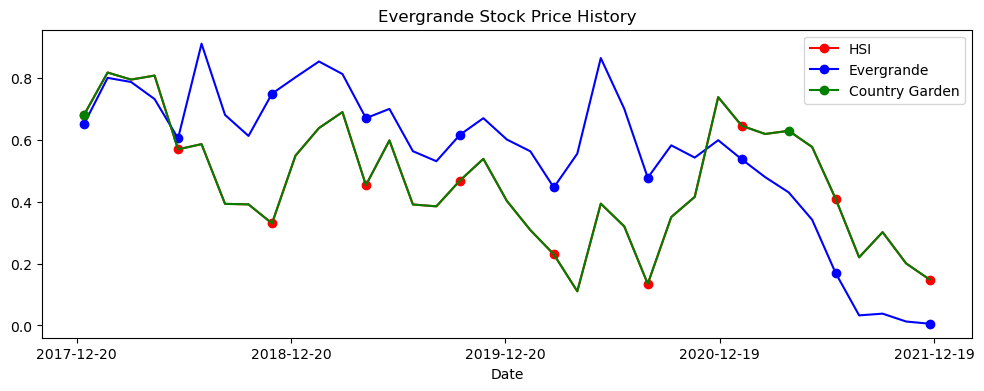

In [60]:
# Plot the data
plt.figure(figsize=(12, 4))  # Set figure size
plt.plot(hsi_norm,
         color='red',
         label='HSI', marker='o', markevery=4)  # Add label for HSI plot

plt.plot(evergrande_norm,
         color='blue',
         label='Evergrande', marker='o', markevery=4)  # Add label for Evergrande plot

plt.plot(country_garden_norm,
         color='green',
         label='Country Garden', marker='o', markevery=30)  # Add label for Country Garden plot

plt.title('Evergrande Stock Price History')  # Set title
plt.xlabel('Date')  # Set x-axis label
# plt.ylabel('Price (USD)')  # Set y-axis label

# Set x-axis ticks to every 30 days
tick_spacing = 365  # Set tick spacing in days
ax = plt.gca()  # Get current axes object
ax.xaxis.set_major_locator(ticker.MultipleLocator(
    tick_spacing))  # Set x-axis tick frequency

# Format x-axis labels as dates
date_format = '%Y-%m-%d'  # Set date format string
ax.xaxis.set_major_formatter(mdates.DateFormatter(
    date_format))  # Set x-axis label format



plt.legend()  # Show legend
plt.show()  # Show plot


In [57]:
country_garden

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,13.887916,15.287908,13.887916,15.063909,11.776280,111352287
2018-01-03,15.213242,15.287908,14.746578,14.914577,11.659538,70460942
2018-01-04,14.839910,15.026576,14.354580,14.485246,11.323908,63107294
2018-01-05,14.559912,15.381241,14.466579,15.138575,11.834652,73469611
2018-01-08,15.306574,16.613234,15.306574,16.258570,12.710213,92525516
...,...,...,...,...,...,...
2021-12-24,7.020000,7.020000,7.020000,7.020000,6.843535,0
2021-12-28,7.040000,7.160000,6.970000,7.120000,6.941021,15177610
2021-12-29,7.090000,7.140000,6.890000,6.960000,6.785044,14700916
